In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [40]:
data = pd.read_csv('Laptop_Price.csv')

In [41]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [42]:
missing = data.isnull().sum()
missing

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [44]:
data.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [45]:
data['Ram'] = data['Ram'].str.replace('GB', '').astype(int)
data['Weight'] = data['Weight'].str.replace('kg', '').astype(float)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 132.5+ KB


In [47]:
data['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [48]:
data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [49]:
data['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [50]:
label_encoder = LabelEncoder()
data['Company'] =label_encoder.fit_transform(data['Company'])
data['TypeName'] =label_encoder.fit_transform(data['TypeName'])
data['OpSys'] =label_encoder.fit_transform(data['OpSys'])

In [51]:
data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,1,MacBook Pro,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,8,1.37,1339.69
1,2,1,Macbook Air,4,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,8,1.34,898.94
2,3,7,250 G6,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,4,1.86,575.00
3,4,1,MacBook Pro,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,8,1.83,2537.45
4,5,1,MacBook Pro,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,8,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,10,Yoga 500-14ISK,0,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,5,1.80,638.00
1299,1317,10,Yoga 900-13ISK,0,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,5,1.30,1499.00
1300,1318,10,IdeaPad 100S-14IBR,3,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,5,1.50,229.00
1301,1319,7,15-AC110nv (i7-6500U/6GB/1TB/Radeon,3,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,5,2.19,764.00


In [52]:

data['ScreenResolution'] = data['ScreenResolution'].str.extract(r'(\d+x\d+)', expand=False)

data[['width', 'height']] = data['ScreenResolution'].str.split('x', expand=True)

data['width'] = pd.to_numeric(data['width'])
data['height'] = pd.to_numeric(data['height'])

data = data.drop('ScreenResolution', axis=1)

In [53]:
data

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,width,height
0,1,1,MacBook Pro,4,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,8,1.37,1339.69,2560,1600
1,2,1,Macbook Air,4,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,8,1.34,898.94,1440,900
2,3,7,250 G6,3,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,4,1.86,575.00,1920,1080
3,4,1,MacBook Pro,4,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,8,1.83,2537.45,2880,1800
4,5,1,MacBook Pro,4,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,8,1.37,1803.60,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,10,Yoga 500-14ISK,0,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,5,1.80,638.00,1920,1080
1299,1317,10,Yoga 900-13ISK,0,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,5,1.30,1499.00,3200,1800
1300,1318,10,IdeaPad 100S-14IBR,3,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,5,1.50,229.00,1366,768
1301,1319,7,15-AC110nv (i7-6500U/6GB/1TB/Radeon,3,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,5,2.19,764.00,1366,768


In [54]:
data['Product'] = pd.Categorical(data['Product']).codes
data['Cpu'] = pd.Categorical(data['Cpu']).codes
data['Gpu'] = pd.Categorical(data['Gpu']).codes
data['Memory'] = pd.Categorical(data['Memory']).codes


In [55]:
data.drop('laptop_ID',axis=1)

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,width,height
0,1,300,4,13.3,65,8,4,58,8,1.37,1339.69,2560,1600
1,1,301,4,13.3,63,8,2,51,8,1.34,898.94,1440,900
2,7,50,3,15.6,74,8,16,53,4,1.86,575.00,1920,1080
3,1,300,4,15.4,85,16,29,9,8,1.83,2537.45,2880,1800
4,1,300,4,13.3,67,8,16,59,8,1.37,1803.60,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,580,0,14.0,89,4,4,47,5,1.80,638.00,1920,1080
1299,10,588,0,13.3,89,16,29,47,5,1.30,1499.00,3200,1800
1300,10,196,3,14.0,34,2,35,40,5,1.50,229.00,1366,768
1301,7,2,3,15.6,89,6,10,21,5,2.19,764.00,1366,768


In [56]:
X = data.drop('Price_euros', axis=1)
y = data['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [59]:
y_pred = model.predict(X_test_scaled)

In [60]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 124710.16
R-squared: 0.73


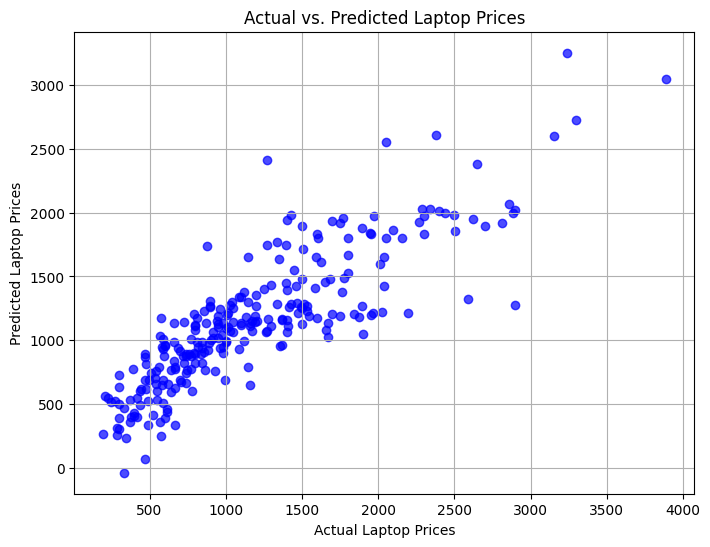

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual Laptop Prices')
plt.ylabel('Predicted Laptop Prices')
plt.title('Actual vs. Predicted Laptop Prices')
plt.grid(True)
plt.show()

In [62]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (Slopes):")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")

print(f"Intercept: {intercept:.2f}")

Coefficients (Slopes):
laptop_ID: 55.96
Company: 55.82
Product: 12.65
TypeName: 55.85
Inches: -110.41
Cpu: 107.37
Ram: 352.57
Memory: 39.80
Gpu: 82.88
OpSys: 87.26
Weight: 94.56
width: 9.67
height: 150.16
Intercept: 1109.61
